In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/Capstone%20Project/data/stroke-dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [7]:
# Get the count of each unique value in the 'gender' column
gender_counts = df['gender'].value_counts()

# Print the unique genders and their counts
print("Gender Counts:")
print(gender_counts)

Gender Counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [8]:
# Drop rows where the 'gender' column contains the value 'other'
df = df[df['gender'] != 'Other']

# Get the unique values in the 'gender' column
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
# Round up the values in the 'age' column to the nearest integer
df['age'] = df['age'].apply(lambda x: math.ceil(x))

# Find the maximum and minimum age
max_age = df['age'].max()
min_age = df['age'].min()

print("Maximum Age:", max_age)
print("Minimum Age:", min_age)

Maximum Age: 82
Minimum Age: 1


In [10]:
# Get the count of each unique value in the 'smoking_status' column
smoking_status_counts = df['smoking_status'].value_counts()

# Print the unique smoking_status and their counts
print("Smoking Status Counts:")
print(smoking_status_counts)

Smoking Status Counts:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Split the data into features (X) and target (y)
X = df.drop(columns=['smoking_status'])
y = df['smoking_status']

# Encode categorical variables
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split the data into training and test sets
X_train, X_test = X_encoded[y != 'Unknown'], X_encoded[y == 'Unknown']
y_train = y[y != 'Unknown']

# Train a machine learning model (Random Forest classifier, for example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the missing values
predicted_values = model.predict(X_test)

# Impute the missing values in the original DataFrame
df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = predicted_values

# Get the count of each unique value in the 'smoking_status' column
smoking_status_counts = df['smoking_status'].value_counts()

# Print the unique smoking_status and their counts
print("Smoking Status Counts:")
print(smoking_status_counts)

Smoking Status Counts:
smoking_status
never smoked       3230
formerly smoked    1041
smokes              838
Name: count, dtype: int64


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.drop('id',axis=1,inplace=True)

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.241143,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.592882,0.296633,0.226084,45.285004,7.698235,0.215340
min,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
# Specify the file path where you want to save the CSV file
file_path = 'stroke-dataset-cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print("DataFrame saved successfully to:", file_path)

DataFrame saved successfully to: stroke-dataset-cleaned.csv


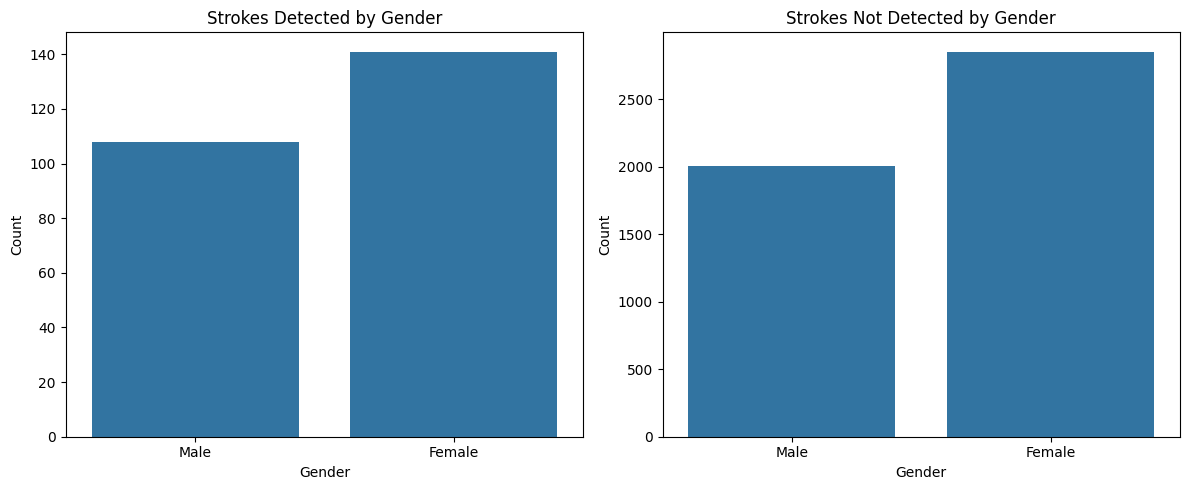

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for stroke detected and not detected separately
stroke_detected = df[df['stroke'] == 1]
stroke_not_detected = df[df['stroke'] == 0]

# Plot two count plots side by side
plt.figure(figsize=(12, 5))

# Plot for strokes detected
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=stroke_detected)
plt.title('Strokes Detected by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot for strokes not detected
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=stroke_not_detected)
plt.title('Strokes Not Detected by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [19]:
# List of columns to encode
cols = features[['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']]

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through columns and encode them
for col in cols:
    features[col] = le.fit_transform(features[col])

In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [22]:
features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,2,1,228.69,36.600000,0
1,0,61,0,0,1,3,0,202.21,28.893237,1
2,1,80,0,1,1,2,0,105.92,32.500000,1
3,0,49,0,0,1,2,1,171.23,34.400000,2
4,0,79,1,0,1,3,0,174.12,24.000000,1


In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.2,random_state=4)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(xtrain, ytrain)

# Make predictions on the testing data
y_pred = rf_classifier.predict(xtest)

# Calculate the accuracy of the model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9500978473581213


In [25]:
# Save the trained model to a .sav file using pickle
import pickle
pickle.dump(rf_classifier,open('./rf_model.sav', 'wb'))

In [26]:
pickle.load(open('rf_model.sav', 'rb'))

RandomForestClassifier(random_state=42)